In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests

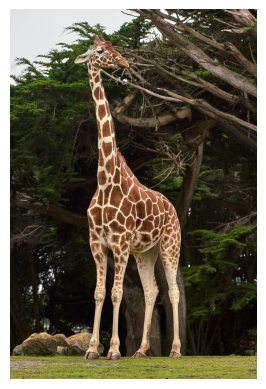

In [3]:
image = load_img('giraffe.jpg') #PIL
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

In [5]:

datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('giraffe.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='gf', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [7]:
def default_datagen():
  datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
  datagen.fit(data)
  return datagen

In [8]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)

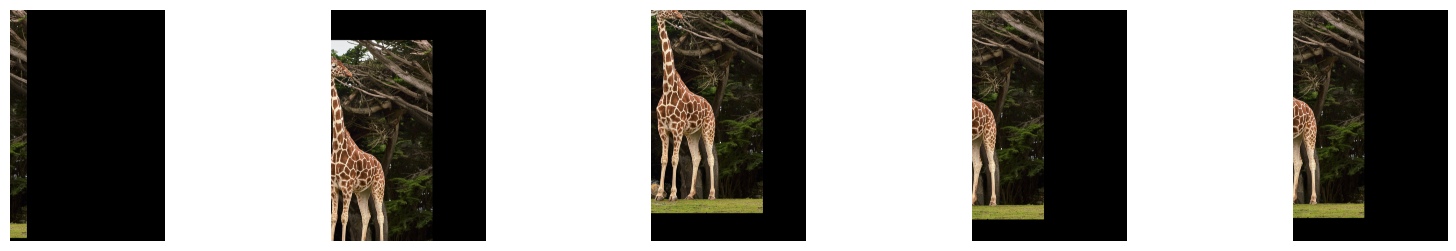

In [9]:
datagen = default_datagen()
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.9
plot_augmentation(datagen, data)

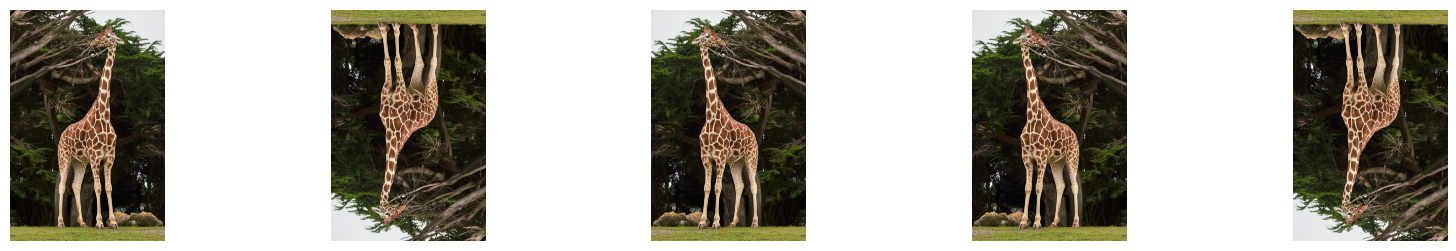

In [10]:
datagen = default_datagen()
datagen.horizontal_flip = True
datagen.vertical_flip = True
plot_augmentation(datagen, data)

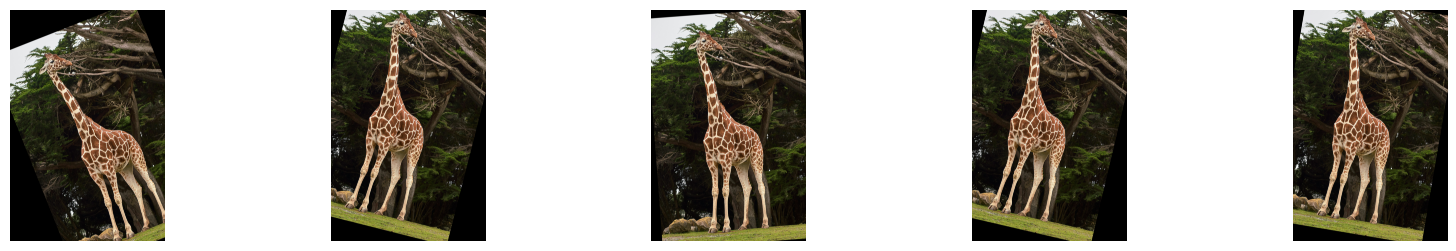

In [11]:
datagen = default_datagen()
datagen.rotation_range = 25
plot_augmentation(datagen, data)

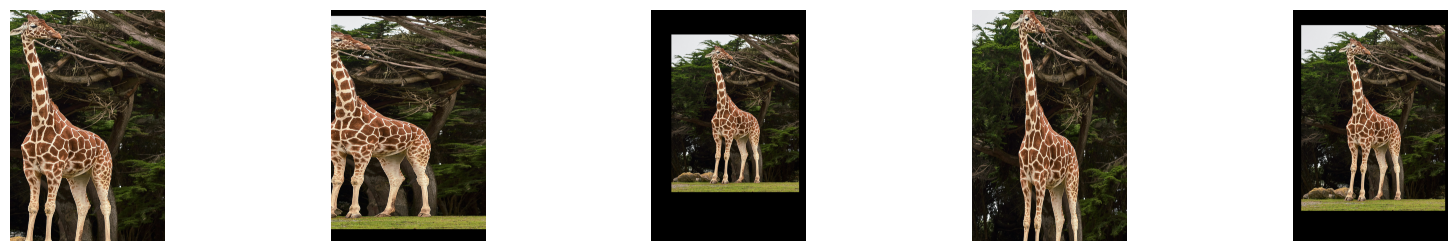

In [12]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

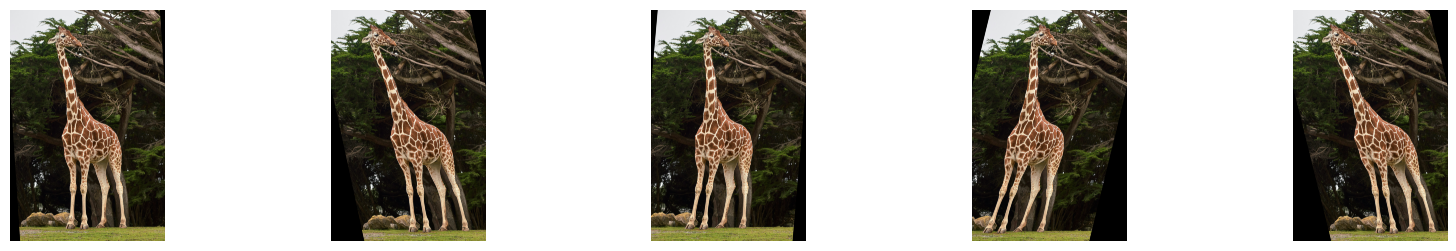

In [13]:
datagen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

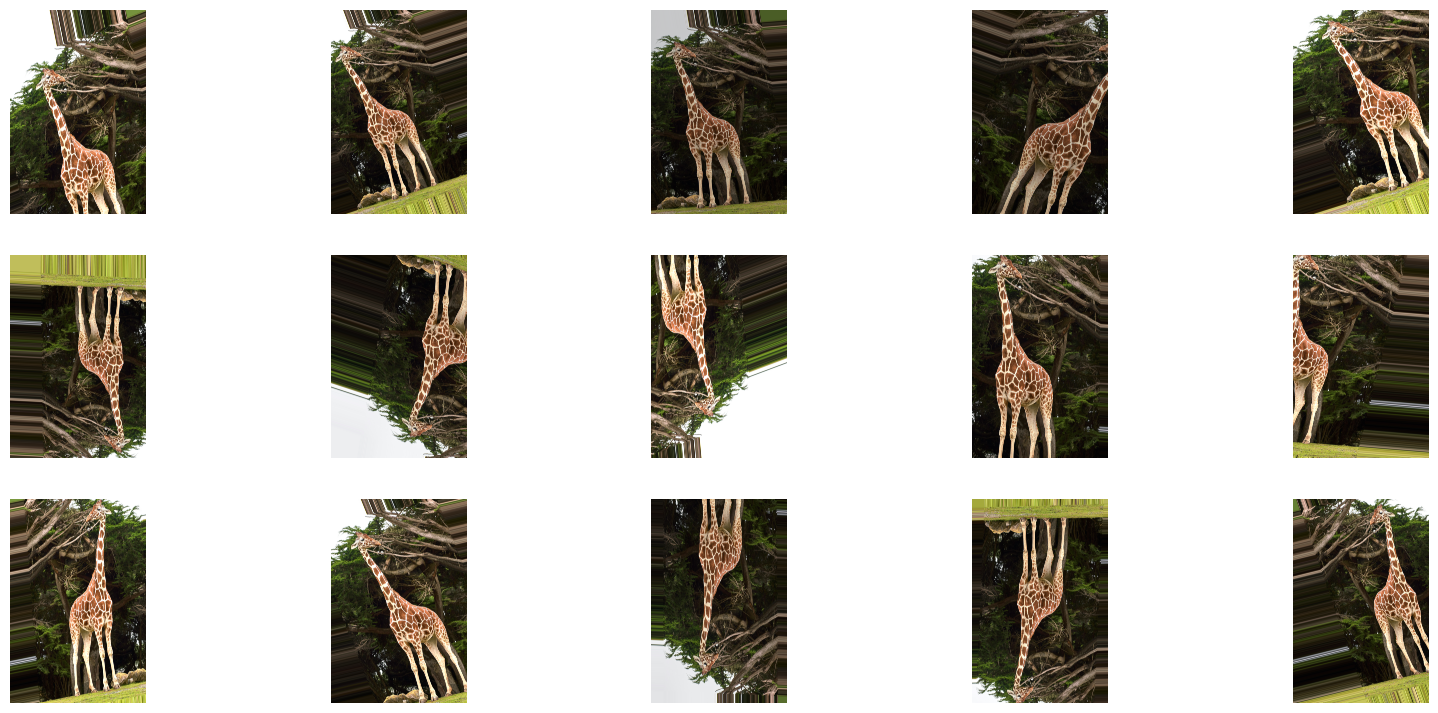

In [14]:
datagen = default_datagen()
datagen.fill_mode='nearest'
datagen.horizontal_flip=True
datagen.vertical_flip = True
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
datagen.zoom_range=[0.8, 1.2]
datagen.rotation_range=20
datagen.shear_range=10
datagen.brightness_range = [0.75, 1.5]
plot_augmentation(datagen, data, n_rows=3, n_cols=5)